<img src="https://images.emojiterra.com/google/android-12l/512px/1f4da.png"
    style="width:100px; float: right; margin: 0 10px 10px 10px;"></img>
# EDA and Data Preprocessing
**Price Prediction Model for Books (in EUR)**
***

Link to a dataset: https://zenodo.org/records/4265096

Link to GitHub: https://github.com/katepopkova8/my_capstone_project

Prepared by Kate Popkova

## Introduction

The book industry faces the complex challenge of pricing books in a way that maximizes profit while remaining attractive to readers. Factors influencing book prices include author popularity, genre trends, publication date, and market demand.

**Opportunities**:
1. Dynamic Pricing Strategy: Leveraging data to adjust prices in response to market demands and trends.
2. Inventory Management: Bookstores and online retailers can manage stock more efficiently by understanding which books are likely to sell at certain prices.
3. Market Analysis: Insight into which factors most significantly impact book prices can guide publishers and authors in decision-making processes, from marketing strategies to choosing publication dates.

**Who Experiences These Problems?**
- Publishers: Struggle to set optimal prices that balance profitability with market competitiveness.
- Retailers: Both online and physical bookstores need to competitively price books to maximize sales and manage inventory. 
- Authors: Especially self-published authors, who must decide on the pricing of their books without the resources of large publishing houses.

**Benefit from the Outcomes**:
- Access to a data-driven pricing model can assist in making more informed decisions, potentially increasing sales and profit margins.
- Better pricing strategies lead to improved customer satisfaction and loyalty.

#### **The Big Idea: Machine Learning Solutions**
Machine learning can revolutionize book pricing by providing a predictive model that considers a wide range of factors influencing a book's value in the market.

- Pattern Recognition: Machine learning algorithms can identify patterns and correlations between various factors (like genre popularity, author reputation, and historical sales data) and book prices.
- Predictive Analytics: By analyzing historical data, the model can forecast optimal pricing points for new or existing books.
- Customization: Machine learning models can be trained to adapt to specific market segments, genres, or geographical regions, providing tailored pricing strategies.

#### **The Impact: Societal and Business Value**

**Business Value**

- Increased Profitability: More accurate pricing leads to better sales and profit margins.
- Market Competitiveness: Businesses can stay competitive by dynamically adjusting prices in response to market trends.
- Efficient Inventory Management: Reduces the likelihood of overstocking or understocking.

**Societal Value**

- Accessibility: Properly priced books become more accessible to a broader audience, potentially increasing literacy and education.
- Author Recognition: Fair pricing strategies can lead to more equitable recognition and compensation for authors, especially those who are new or self-published.

My projects aims to build a price prediction model in the book industry. The dataset I'll be using has 52,478 records on books collected from an e-commerce platform called Iberlibro (https://www.iberlibro.com/). IberLibro is an online platform for the buying and selling of books, art and collectibles . It is trusted by independent sellers around the world to offer millions of new, second-hand and collectible books; as well as art and collecting items.

The dataset was created by two students Lorena Casanova Lozano and Sergio Costa Planells in 2020 in Barcelona, Spain. 

In this notebook, I will explore and perform Exploratory Data Analysis (EDA) to uncover valuable insights from the data, identify patterns, correlations, and interesting trends. 


## Data Dictionary

My dataset (books_1.Best_Books_Ever.csv) containes the following fields:

| Attributes | Definition|
|:------------|:------------|
| bookId     | Book Identifier as in goodreads.com |
| title      | Book title |
| series     | Series Name |
| author      | Book's Author |
| rating     | Global goodreads rating |
| description      | Book's description |
| language     | Book's language |
| isbn     | Book's ISBN |
| genres     | Book's genres |
| characters      | Main characters |
| bookFormat     | Type of binding |
| edition     | Type of edition (ex. Anniversary Edition) |
| pages     | Number of pages |
| publisher      | Editorial |
| publishDate      | Publication date |
| firstPublishDate      | Publication date of first edition |
| awards      | List of awards |
| numRatings      | Number of total ratings|
| ratingsByStars      | Number of ratings by stars (from 5 to 1)|
| likedPercent      | Derived field, percent of ratings over 2 starts (as in GoodReads) |
| setting      | Story setting |
| coverImg      | URL to cover image |
| bbeScore      | Score in Best Books Ever list |
| bbeVotes      | Number of votes in Best Books Ever list |
| price      | Book's price in EUR (extracted from Iberlibro) |



**`price`** is my target variable, and I'll be focusing on attributes relevant to book pricing, such as 

- **`rating`**, 
- **`genres`**, 
- **`bookFormat`**, 
- **`publisher`**, 
- **`awards`**, 
- **`title`**.

## Part 1: Data Exploration

1. [Initial Data Review](#Initial-Data-Review)
2. [Irrelevant Columns](#Irrelevant-Columns)
3. [Statistical Summary](#Statistical-Summary)
4. [Initial Data Visualization](#Initial-Data-Visualization)
5. [Missing Values](#Missing-Values)
6. [Feature Engineering](#Feature-Engineering)
7. [Preprocessing for Modeling](#Preprocessing-for-Modeling)
8. [Data Splitting](#Data-Splitting)

### Initial Data Review

I'm goint to get a basic understanding of my dataset, look at the first few rows, understand each column's type and role, and identify any obvious issues or anomalies.

In [14]:
# The libraries I'll be using to conduct EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [15]:
# To upload the data from csv file and to do a quick sanity check
df=pd.read_csv('books_1.Best_Books_Ever.csv')
df.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [16]:
# The shape of the data
print("Shape of the DataFrame:")
print(df.shape)

Shape of the DataFrame:
(52478, 25)


In [17]:
# To check the data types
print("Info of the DataFrame:")
df.info()

Info of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52478 non-null  object 
 1   title             52478 non-null  object 
 2   series            23470 non-null  object 
 3   author            52478 non-null  object 
 4   rating            52478 non-null  float64
 5   description       51140 non-null  object 
 6   language          48672 non-null  object 
 7   isbn              52478 non-null  object 
 8   genres            52478 non-null  object 
 9   characters        52478 non-null  object 
 10  bookFormat        51005 non-null  object 
 11  edition           4955 non-null   object 
 12  pages             50131 non-null  object 
 13  publisher         48782 non-null  object 
 14  publishDate       51598 non-null  object 
 15  firstPublishDate  31152 non-null  object 
 16  awards           

In [18]:
# Counting unique values for each column
print("Unique values in each column:")
print(df.nunique())

Unique values in each column:
bookId              52424
title               49927
series              22802
author              28227
rating                261
description         50888
language               81
isbn                48072
genres              44154
characters          12448
bookFormat            136
edition              1788
pages                1365
publisher           11110
publishDate         10635
firstPublishDate     8024
awards               9215
numRatings          19347
ratingsByStars      49908
likedPercent           66
setting              4651
coverImg            51819
bbeScore             3541
bbeVotes              649
price                3776
dtype: int64


In [19]:
# Check if there are duplicated rows in the dataset
print("Number of duplicated rows:")
print(df.duplicated().sum())

Number of duplicated rows:
50


In [20]:
# The sum of NA values in each column, sorted in descending order
print("Number of missing values in each column (sorted in descending order):")
print(df.isna().sum().sort_values(ascending=False))

Number of missing values in each column (sorted in descending order):
edition             47523
series              29008
firstPublishDate    21326
price               14365
language             3806
publisher            3696
pages                2347
bookFormat           1473
description          1338
publishDate           880
likedPercent          622
coverImg              605
isbn                    0
ratingsByStars          0
bbeVotes                0
bbeScore                0
setting                 0
awards                  0
numRatings              0
genres                  0
author                  0
rating                  0
title                   0
characters              0
bookId                  0
dtype: int64


In [21]:
# Summary of the missing values in each column, along with their respective percentages
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values_percentage = (missing_values / len(df)) * 100
missing_values_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_values_percentage})
missing_values_summary

,Missing Values,Percentage (%)
edition,47523,90.557948
series,29008,55.276497
firstPublishDate,21326,40.637982
price,14365,27.373376
language,3806,7.252563
publisher,3696,7.042951
pages,2347,4.472350
bookFormat,1473,2.806891
description,1338,2.549640
publishDate,880,1.676893


**Summary**
* The columns in my dataset have high cardinality. It can lead to issues like overfitting and increased computational complexity. I'll consider managing this through techniques like binning.
* A significant amount of columns that are relevant to my project goal have a substantial amount of missing data. This can affect my analysis or model's accuracy. 

### Irrelevant Columns

I'm going to drop the columns that are with redundant information and are not related to the `price` target variable. These colums are:
- `bookId`, 
- `isbn`, 
- `firstPublishDate`, and 
- `likedPercent`. 

I'll also drop columns that contain images and large text. 
These columns are:
- `description`, 
- `setting`, and 
- `coverImg`. 

I'll revisit these columns later in my analysis, for now I don't need them. 

In [22]:
# Columns to be dropped
columns_to_drop = ['bookId', 'description', 'isbn', 'likedPercent', 
                   'setting', 'coverImg', 'firstPublishDate']

# Dropping the specified columns
df = df.drop(columns=columns_to_drop)

# Shape of the final data
print("Shape of the DataFrame after dropping the specified columns:")
df.shape

Shape of the DataFrame after dropping the specified columns:


(52478, 18)

### Statistical Summary

Before I perform a more detailed exploratory analysis on the reduced dataset, I'm going to drop duplicated rows (50) and convert `price` column from object to a numeric data type.

In [23]:
# Dropping the duplicated rows
df = df.drop_duplicates()
df.shape

(52428, 18)

In [24]:
# Converting the 'price' column to a numeric data type
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price'].dtype                      

dtype('float64')

In [25]:
# Statistical summary of the numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,52428.0,4.021865,0.367116,0.00,3.82,4.03,4.2300,5.00
numRatings,52428.0,17892.598440,103993.201959,0.00,341.00,2309.50,9389.0000,7048471.00
bbeScore,52428.0,1985.832475,35169.854432,0.00,84.00,97.00,187.0000,2993816.00
bbeVotes,52428.0,22.549535,369.333934,-4.00,1.00,1.00,2.0000,30516.00
price,38072.0,9.657951,24.305323,0.84,3.24,5.20,8.8525,898.64


The preliminary EDA reveals the following insights:

* The average price per book is around 10 EUR.
* The average book rating is around 4.02, with a standard deviation of 0.37.
* The number of ratings per book varies widely, with an average of about 17,879 but a high standard deviation, indicating a large spread.
* The bbeScore and bbeVotes have a wide range, which may indicate outliers or a highly varied dataset.

### Initial Data Visualization

Next, I will explore the distribution of my dataset.

#### Distribution of numerical columns.

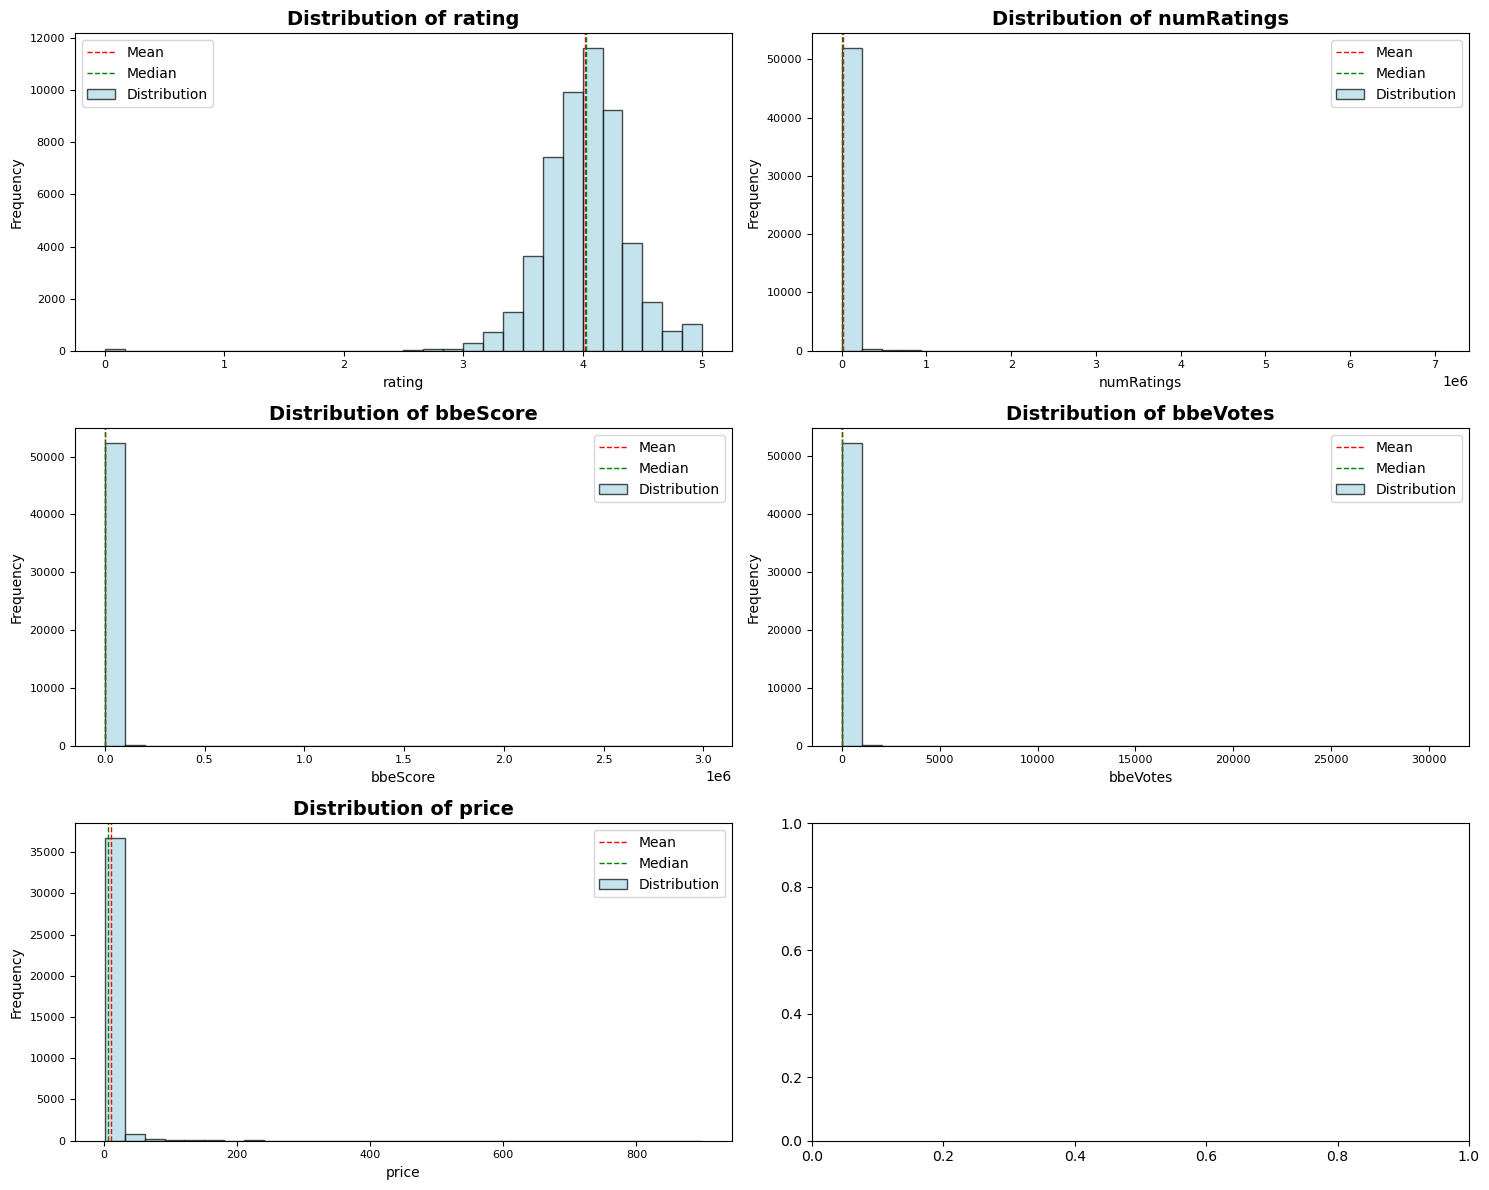

In [26]:
# First, I need to identify numeric columns
df_num = df.select_dtypes(include="number")

# I will make 3 rows x 2 columns of subplots
plt.subplots(3,2, figsize=(15,12))

# Creating the for loop
for slot_num, column in enumerate(df_num.columns, start=1):
    
    # Creating a hist for every iteration
    plt.subplot(3,2,slot_num)
    plt.hist(df[column], bins=30, alpha=0.7, color='lightblue', edgecolor='black')
    
    # Set the titles and labels
    plt.title(f"Distribution of {column}", fontsize=14, fontweight='bold')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tick_params(axis='x', labelsize=8)  # Make x-axis labels smaller
    
    # Adding median and mean lines
    plt.axvline(df[column].mean(), color='red', linestyle='dashed', linewidth=1)
    plt.axvline(df[column].median(), color='green', linestyle='dashed', linewidth=1)
    plt.legend(['Mean', 'Median', 'Distribution'])
    plt.tick_params(axis='x', labelsize=8)
    plt.tick_params(axis='y', labelsize=8)
    
plt.tight_layout()
plt.show()

 - **`Rating`**: The distribution of ratings appears to be left-skewed, indicating that most books have high ratings. There's a concentration of ratings around 4, suggesting that readers generally rate books positively.

To better visualize the rest of the numerical data, I'll use logarithmic scales. This can help in spreading out the data points more evenly across the histogram and providing a clearer view of the distribution.

**Distribution of `numRatings`**

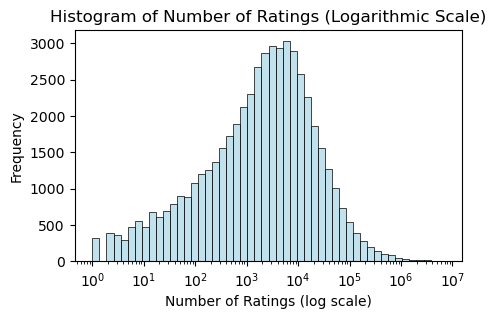

In [27]:
# Filtering out zero and negative values for the logarithmic scale
positive_num_ratings = df['numRatings'][df['numRatings'] > 0]

# The histogram for the 'numRatings' column with a logarithmic scale
plt.figure(figsize=(5, 3))
sns.histplot(positive_num_ratings, bins=50, log_scale=True, color='lightblue')
plt.title('Histogram of Number of Ratings (Logarithmic Scale)')
plt.xlabel('Number of Ratings (log scale)')
plt.ylabel('Frequency')
plt.show()

* The distribution of the number of ratings appear more uniform across the different magnitudes.

* Books in the dataset have a wide range of ratings, from a few to several thousand. 

**Distribution of `price`**

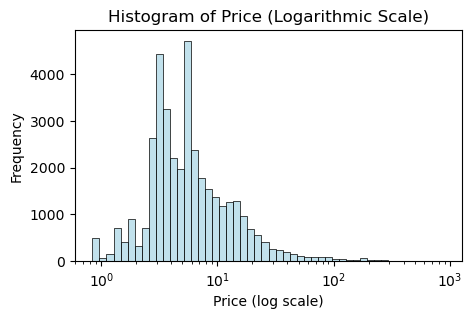

In [28]:
# Filtering out zero and negative values for the logarithmic scale
positive_prices = df['price'][df['price'] > 0]

# The histogram for the 'price' column with a logarithmic scale
plt.figure(figsize=(5, 3))
sns.histplot(positive_prices, bins=50, log_scale=True, color='lightblue')
plt.title('Histogram of Price (Logarithmic Scale)')
plt.xlabel('Price (log scale)')
plt.ylabel('Frequency')
plt.show()

* The tail of the histogram extends further, indicating the presence of books with significantly higher prices, although they are less frequent.

* The distribution still appears right-skewed on the logarithmic scale. While most books are priced lower, there are books across a wide range of higher prices.

**Distribution of `bbeScore` and `bbeVotes`**

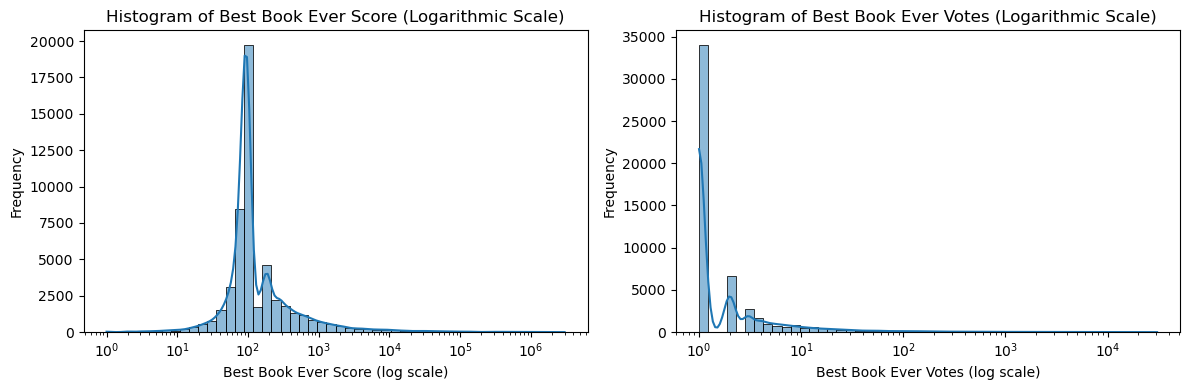

In [29]:
# Filtering out zero and negative values for the logarithmic scale for bbeScore and bbeVotes
positive_bbeScore = df['bbeScore'][df['bbeScore'] > 0]
positive_bbeVotes = df['bbeVotes'][df['bbeVotes'] > 0]

# Plotting histograms for bbeScore and bbeVotes with logarithmic scales
plt.figure(figsize=(12, 4))

# Histogram for bbeScore
plt.subplot(1, 2, 1)
sns.histplot(positive_bbeScore, bins=50, kde=True, log_scale=True)
plt.title('Histogram of Best Book Ever Score (Logarithmic Scale)')
plt.xlabel('Best Book Ever Score (log scale)')
plt.ylabel('Frequency')

# Histogram for bbeVotes
plt.subplot(1, 2, 2)
sns.histplot(positive_bbeVotes, bins=50, kde=True, log_scale=True)
plt.title('Histogram of Best Book Ever Votes (Logarithmic Scale)')
plt.xlabel('Best Book Ever Votes (log scale)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Best Book Ever Score (bbeScore):**

* The distribution on the log scale shows a broader range of scores. Most scores are clustered in the lower range, but there's a visible spread into higher score ranges.
* The distribution remains right-skewed, indicating that fewer books achieve very high scores.

**Best Book Ever Votes (bbeVotes):**

* Similar to the bbeScore, the votes are mostly concentrated in the lower range, with fewer books receiving a high number of votes.
* The histogram exhibits a long tail, highlighting that while the majority of books have fewer votes, some have managed to gather a significantly higher number of votes.

#### Distribution of categorical columns.

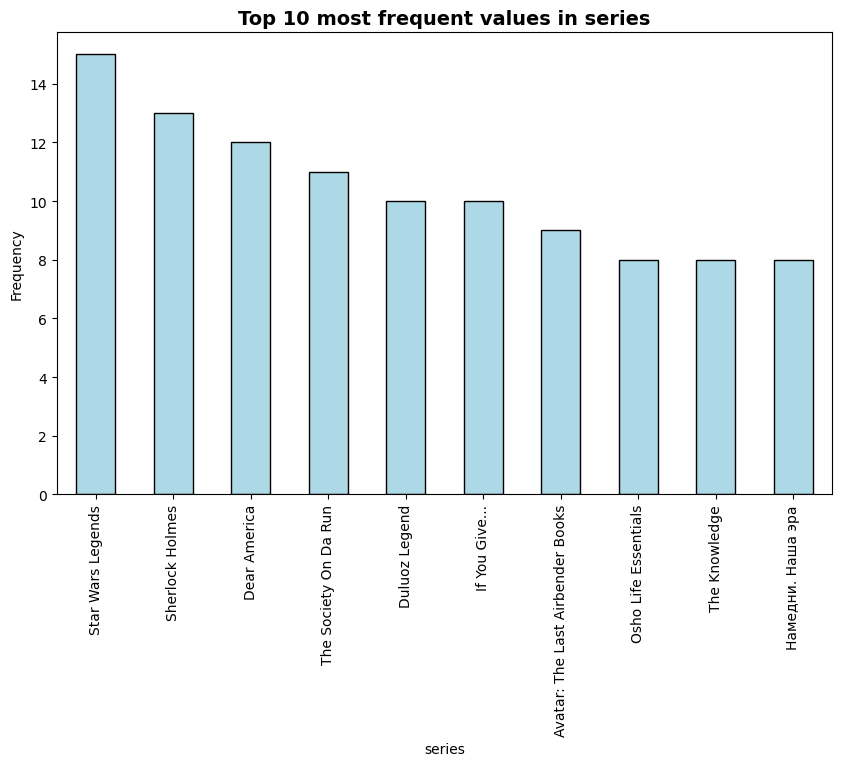

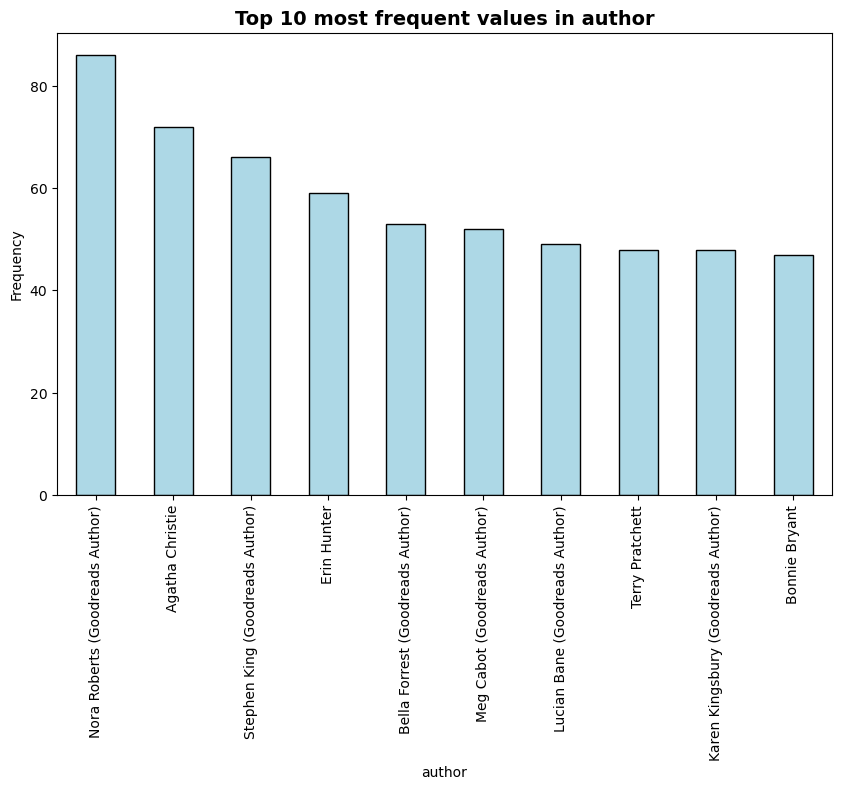

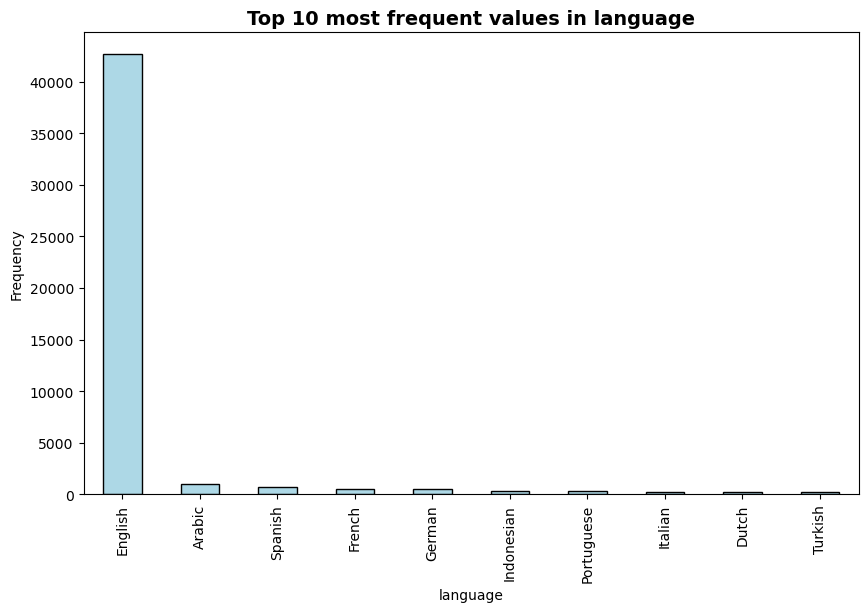

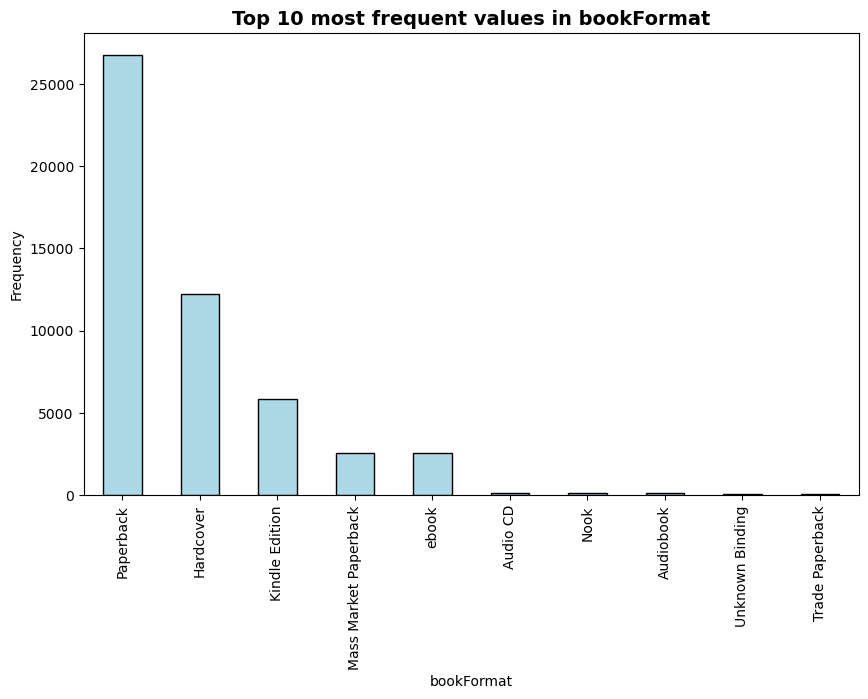

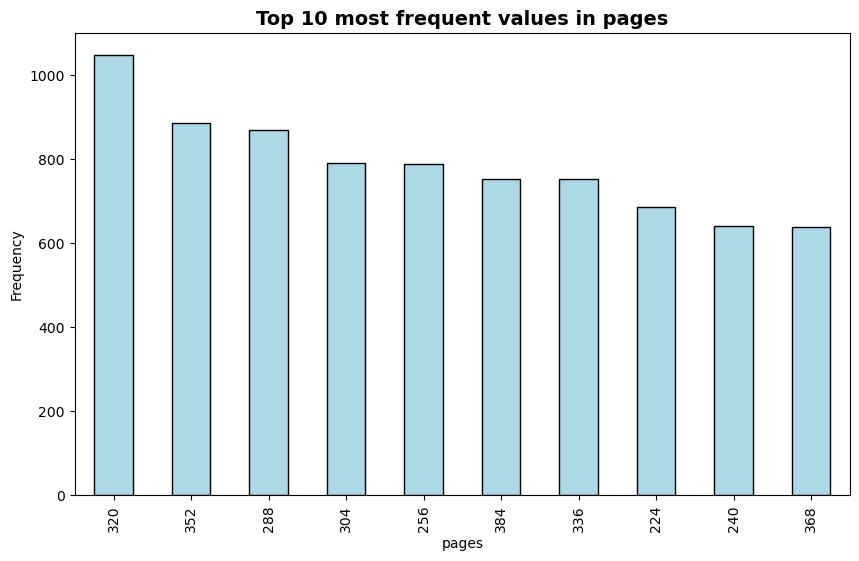

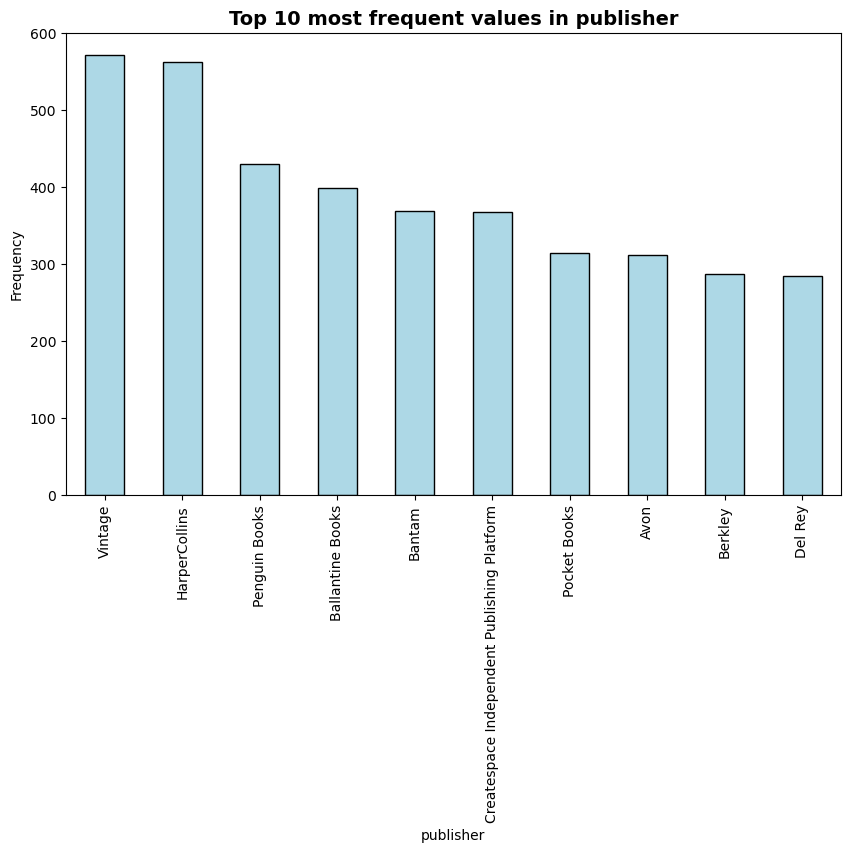

In [30]:
# Selecting categorical columns I'm interested in
categorical_columns = ['series', 'author', 'language', 'bookFormat', 'pages', 'publisher']

# Looping through each categorical column to create a bar chart for the top 10 values
for col in categorical_columns:
    top_10_values = df[col].value_counts().nlargest(10) 

    plt.figure(figsize=(10, 6))
    top_10_values.plot(kind='bar', color='lightblue', edgecolor='black')
    plt.title(f'Top 10 most frequent values in {col}', fontsize=14, fontweight='bold')
    plt.ylabel('Frequency')
    plt.show()

**Summary**
* The most frequent series are **Star Wars Legends**, **Sherlock Holmes** and **Dear America**. This could indicate popular series with multiple books.

* The authors with popular works are **Nora Roberts**, **Agatha Christie** and **Stephen King**.

* The most common language is **English**.

* The most common formats are **paperback**, **hardcover**, **kindle edition**, **MMP**, and **e-book**. This reflects publishing trends and reader preferences.

* This chart shows the most common page counts, around **300 pages**. It gives an idea of the typical length of books in the dataset.

* The most frequent publishers are **Vintage** and **Harper Collins**, indicating which publishers have the most books in this collection.

Let's look at correlation between numerical columns.

In [31]:
# Selecting numerical columns
df_num = df.select_dtypes(include="number")
df_num.corr()

,rating,numRatings,bbeScore,bbeVotes,price
rating,1.000000,0.014880,0.015366,0.015563,0.124811
numRatings,0.014880,1.000000,0.709226,0.719139,-0.029961
bbeScore,0.015366,0.709226,1.000000,0.999303,-0.008476
bbeVotes,0.015563,0.719139,0.999303,1.000000,-0.009304
price,0.124811,-0.029961,-0.008476,-0.009304,1.000000


The heatmap above displays the correlation matrix for the numerical columns in your dataset. 

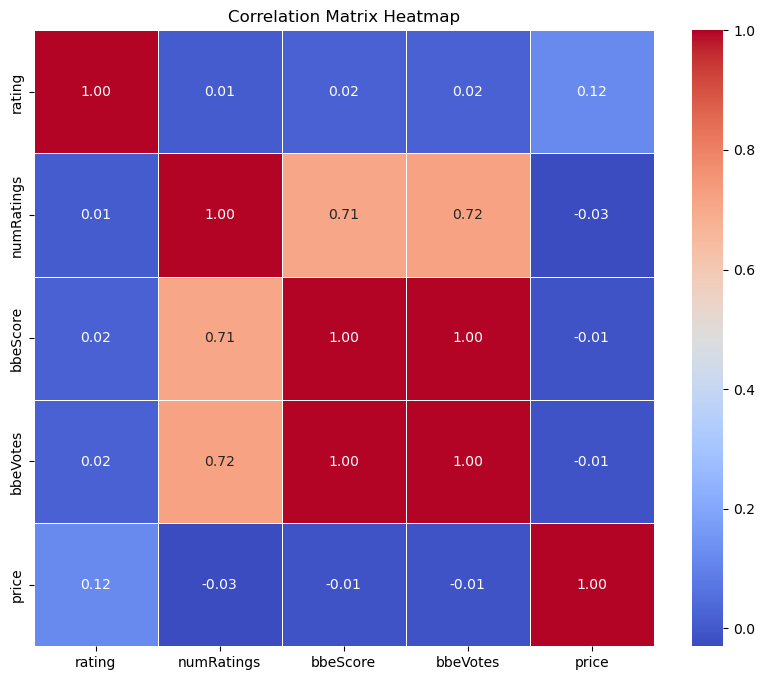

In [32]:
# To display the heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(round(df_num.corr(),2),cmap='coolwarm',annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

* The target variable `price` does not show strong linear correlation with most other variables. This suggests that linear relationships might not be strongly evident in my dataset, or that the price is influenced by factors not captured in these numerical variables alone.

* Variables like `numRatings`, `bbeScore`, and `bbeVotes` show significant positive correlations with each other. This indicates that books with a higher number of ratings tend to have higher scores and votes, which is intuitive as more popular books are likely to attract more attention and engagement.

Now I'm going to explore the relationship between certain categorical variables and `price`.

**`author` vs. `price`**

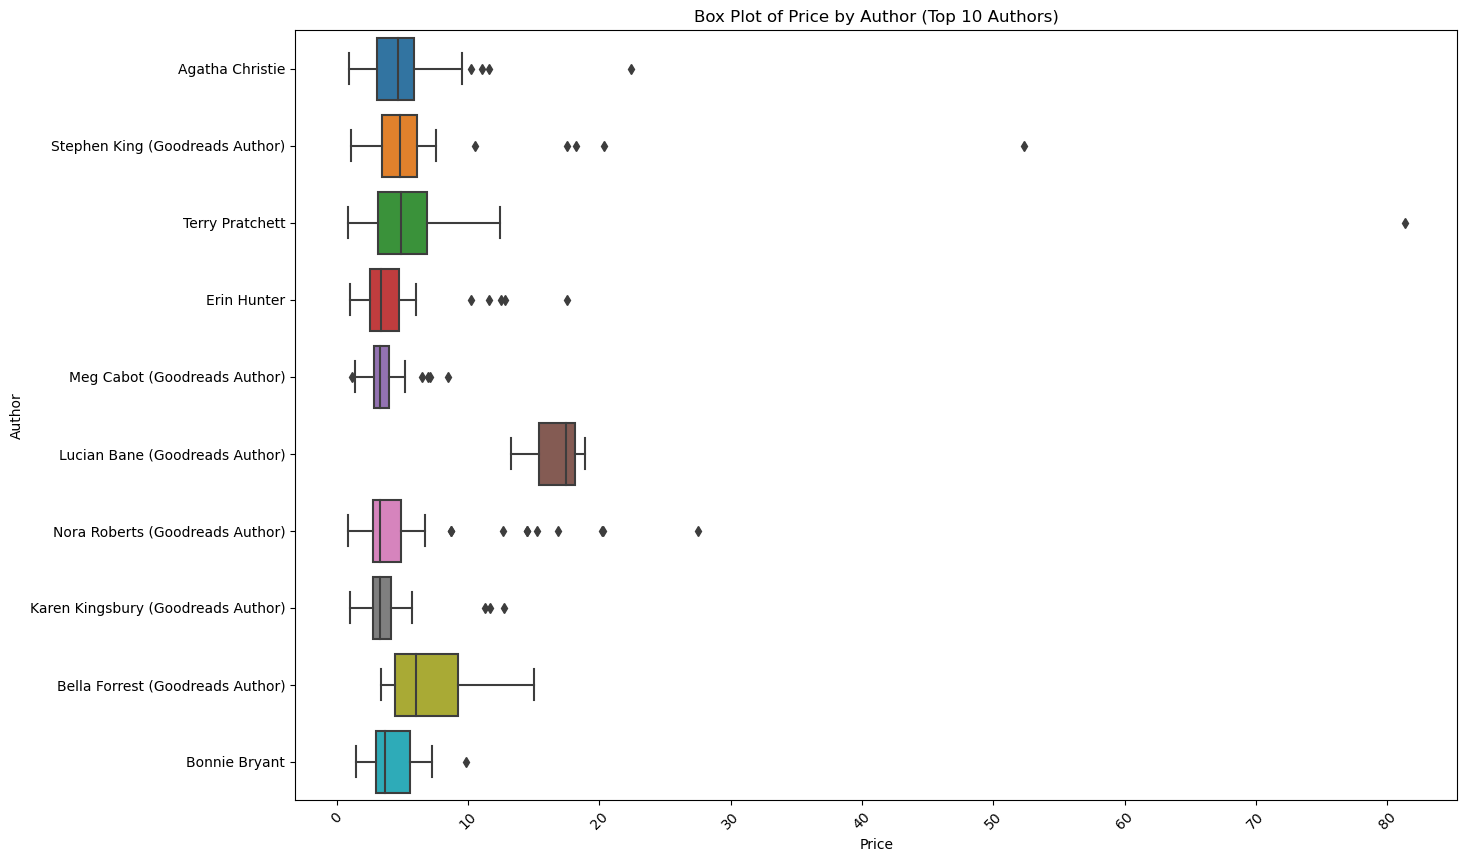

In [33]:
# Creating a box plot to show the relationship between 'author' and 'price'
plt.figure(figsize=(15, 10))
sns.boxplot(x='price', y='author', data=df[df['author'].isin(df['author'].value_counts().nlargest(10).index)])
plt.title('Box Plot of Price by Author (Top 10 Authors)')
plt.xlabel('Price')
plt.ylabel('Author')
plt.xticks(rotation=45)
plt.show()

- There's a noticeable variation in median prices across different authors.
- Lucian Bane's books are significantly higher in prices than the typical range for books by other authors.
- Two outliers with prices at ~50 EUR and ~80 EUR.

**`bookFormat` vs. `price`**

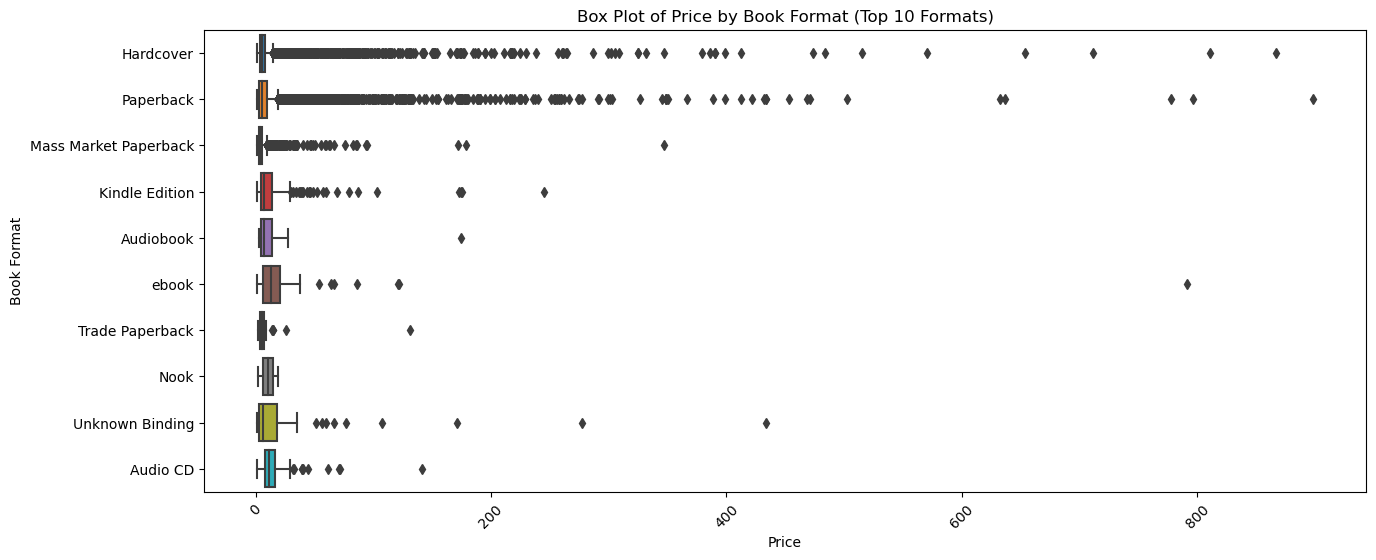

In [34]:
# Creating a box plot to show the relationship between 'bookFormat' and 'price'
plt.figure(figsize=(15, 6))
sns.boxplot(x='price', y='bookFormat', data=df[df['bookFormat'].isin(df['bookFormat'].value_counts().nlargest(10).index)])
plt.title('Box Plot of Price by Book Format (Top 10 Formats)')
plt.xlabel('Price')
plt.ylabel('Book Format')
plt.xticks(rotation=45)
plt.show()

- Some formats might inherently be more expensive due to production costs and other factors.

### Missing Values

Now I'm going to focus on missing data.

In [35]:
# The sum of NA values in each column, sorted in descending order after dropping irrelevant columns
df.isna().sum().sort_values(ascending=False)

edition           47479
series            28983
price             14356
language           3801
publisher          3692
pages              2343
bookFormat         1473
publishDate         879
characters            0
genres                0
rating                0
author                0
awards                0
numRatings            0
ratingsByStars        0
bbeScore              0
bbeVotes              0
title                 0
dtype: int64

In [36]:
# Summary of the missing values in each column, along with their respective percentages
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values_percentage = (missing_values / len(df)) * 100
missing_values_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_values_percentage})
missing_values_summary

,Missing Values,Percentage (%)
edition,47479,90.560388
series,28983,55.281529
price,14356,27.382315
language,3801,7.249943
publisher,3692,7.042039
pages,2343,4.468986
bookFormat,1473,2.809567
publishDate,879,1.676585
characters,0,0.000000
genres,0,0.000000


I'm going to remove missing values from columns that represent 1-10% of the dataset. 

In [37]:
# Identifying the columns that need to be cleaned
columns_to_clean = ['language', 'publisher', 'pages', 'bookFormat', 
                    'publishDate']

# Removing rows with missing values in the specified columns
df = df.dropna(subset=columns_to_clean)

# Shape of the cleaned data
print("Shape of the DataFrame:")
df.shape

Shape of the DataFrame:


(44304, 18)

Since the `price` column is my target variable for a price prediction model, the presence of a significant amount of missing data (about 27.38%) is a crucial issue to address. The data is not normally distributed so I'm not going to do Mean/Median Imputation. Instead, I will exclude rows with missing price data. This reduces the dataset size but can result in a cleaner, more reliable dataset for modeling.

In [38]:
# Dropping rows with missing values in the 'price' column
df = df.dropna(subset=['price'])

# Shape of the data after dropping missing values in 'price'
print("Shape of the DataFrame:")
df.shape

Shape of the DataFrame:


(35093, 18)

### Feature Engineering 

I'm going to create new features or transform existing ones to better suit my analysis.

**`edition` column**

In [39]:
# Viewing the 'edition' column and its unique values
edition_values = df['edition'].unique()

# Displaying the first 10 unique values 
edition_values[:10]

array(['First Edition', 'US Edition', nan, 'First American Edition',
       'Hobbit Movie Tie-in Boxed set', 'Fourth Edition',
       'Penguin Classics', 'Penguin Great Books of the 20th Century',
       'Folger Shakespeare Library Edition', '25th Anniversary Edition'],
      dtype=object)

I'm going to transform `edition` column into a binary column:
- 1 represents a special edition (any non-NaN value in the original 'edition' column).
 - 0 represents a standard or undefined edition (NaN values in the original 'edition' column).

In [40]:
# Creating a binary column for 'edition'
df['edition_binary'] = df['edition'].notna().astype(int)

# Displaying the first few rows to see the new binary column
df[['edition', 'edition_binary']].head()

,edition,edition_binary
0,First Edition,1
1,US Edition,1
4,NaN,0
5,First American Edition,1
6,NaN,0


**`series` column**

In [41]:
# Viewing the 'series' column and its unique values
series_values = df['series'].unique()

# Displaying the first 10 unique values 
series_values[:10]

array(['The Hunger Games #1', 'Harry Potter #5', 'The Twilight Saga #1',
       nan, 'The Lord of the Rings #0-3',
       "Alice's Adventures in Wonderland #1-2", 'Divergent #1',
       'The Mortal Instruments #1', "Ender's Saga #1",
       'Anne of Green Gables #1'], dtype=object)

The `series` column contains a variety of unique values, each representing the series to which a book belongs. These values indicate the series name and often the specific number or range within the series. The presence of NaN values signifies books that are either standalone or where the series information is missing.

I'm going to tranform `series` column into a binary column:
- 1: The book is part of a series (any non-NaN value).
- 0: The book is not part of a series or the series information is missing (NaN value).

In [42]:
# Creating a binary column for 'series'
df['series_binary'] = df['series'].notna().astype(int)

# Displaying the first few rows to see the new binary column
df[['series', 'series_binary']].head()

,series,series_binary
0,The Hunger Games #1,1
1,Harry Potter #5,1
4,The Twilight Saga #1,1
5,NaN,0
6,NaN,0


**`title` column**

I'm goint to count the text length of book titles (words + spaces) and create a new column.

In [43]:
# Calculating the length of each title
df['title_length'] = df['title'].apply(len)

# Displaying the first few rows to confirm the new feature
df[['title', 'title_length']].head()

,title,title_length
0,The Hunger Games,16
1,Harry Potter and the Order of the Phoenix,41
4,Twilight,8
5,The Book Thief,14
6,Animal Farm,11


**`awards` column**

I'm going to count the number of awards for each book and create new numeric columns for these counts. I'll parse the 'awards' column, which contains lists in string format, and count the number of items in each list.

In [44]:
import ast

# Function to count the number of items in the 'awards' column
def count_items(item_string):
    try:
        # Converting the string representation of the list into an actual list
        item_list = ast.literal_eval(item_string)
        return len(item_list)
    except:
        # In case of any exception return 0
        return 0

# Applying the function to the 'awards' column
df['total_awards'] = df['awards'].apply(count_items)

# Displaying the first few rows to confirm the new features
df[['awards', 'total_awards']].head()

,awards,total_awards
0,['Locus Award Nominee for Best Young Adult Boo...,41
1,['Bram Stoker Award for Works for Young Reader...,9
4,"['Georgia Peach Book Award (2007)', 'Buxtehude...",25
5,['National Jewish Book Award for Children’s an...,20
6,"['Prometheus Hall of Fame Award (2011)', 'Retr...",2


**`ratingByStars` column**

I'm going to parse the ratingsByStars column to extract individual counts.
* rating_5_stars, 
* rating_4_stars, 
* rating_3_stars, 
* rating_2_stars, and 
* rating_1_star. 

Each of these features represents the count of ratings for each star level.

In [45]:
# Function to parse the 'ratingsByStars' column and extract individual star counts
def parse_ratings(ratings_string):
    try:
        # Converting the string representation of the list into an actual list
        ratings_list = ast.literal_eval(ratings_string)
        # Ensuring the list has 5 elements, corresponding to 5 star categories
        if len(ratings_list) == 5:
            return [int(rating) for rating in ratings_list]
        else:
            return [0, 0, 0, 0, 0]  # In case the list doesn't have 5 elements
    except:
        # In case of any exception return zeros
        return [0, 0, 0, 0, 0]

# Applying the function to the 'ratingsByStars' column
df[['rating_5_stars', 'rating_4_stars', 'rating_3_stars', 'rating_2_stars', 'rating_1_star']] = \
    pd.DataFrame(df['ratingsByStars'].apply(parse_ratings).tolist(), index=df.index)

# Displaying the first few rows to confirm the new features
df[['ratingsByStars', 'rating_5_stars', 'rating_4_stars', 'rating_3_stars', 'rating_2_stars', 'rating_1_star']].head()

,ratingsByStars,rating_5_stars,rating_4_stars,rating_3_stars,rating_2_stars,rating_1_star
0,"['3444695', '1921313', '745221', '171994', '93...",3444695,1921313,745221,171994,93557
1,"['1593642', '637516', '222366', '39573', '14526']",1593642,637516,222366,39573,14526
4,"['1751460', '1113682', '1008686', '542017', '5...",1751460,1113682,1008686,542017,548674
5,"['1048230', '524674', '186297', '48864', '26211']",1048230,524674,186297,48864,26211
6,"['986764', '958699', '545475', '165093', '84682']",986764,958699,545475,165093,84682


Note:

To double check my logic, I'll look at `likedPercent` column, which is a drived field, percent of ratings over 2 starts.

1st row: 0 - 3,444,695 - 1,921,313 - 745,221 - 171,994 - 93,557 - likedPercent is 96%**

(6111229*100)/6376780 = 95.83

**Dummy variables for `genres` column**

1. I'm going to parse the genres strings into actual lists. 
2. Then I'll transform the dataset such that each genre gets its own row. 
3. I'm going to use the get_dummies function to convert the exploded genre data into dummy variables. 
4. Aggregate these dummy variables back to the original book level, ensuring that if a book belongs to multiple genres, it gets marked correctly in each respective dummy column.
5. Finally, merge these new dummy variables back into your original DataFrame.

In [46]:
# Convert the string representation of lists into actual lists
df['genres'] = df['genres'].apply(ast.literal_eval)

In [47]:
# Explode the genres column to create a new row for each genre within each book
exploded_genres = df[['genres']].explode('genres')

In [48]:
# Create dummy variables for each genre
genre_dummies = pd.get_dummies(exploded_genres['genres'], prefix='genre')

In [49]:
# Aggregate the dummy variables back to the original book level
genre_dummies = genre_dummies.groupby(genre_dummies.index).sum()
genre_dummies

,genre_10th Century,genre_11th Century,genre_12th Century,genre_13th Century,genre_14th Century,genre_15th Century,genre_16th Century,genre_17th Century,genre_18th Century,genre_19th Century,...,genre_Young Adult Paranormal,genre_Young Adult Romance,genre_Young Adult Science Fiction,genre_Young Readers,genre_Yuri,genre_Zambia,genre_Zen,genre_Zimbabwe,genre_Zombies,genre_漫画
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52470,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52472,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
52475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Merge the new dummy variables with the original DataFrame
df = df.join(genre_dummies)
df.head()

,title,series,author,rating,language,genres,characters,bookFormat,edition,pages,...,genre_Young Adult Paranormal,genre_Young Adult Romance,genre_Young Adult Science Fiction,genre_Young Readers,genre_Yuri,genre_Zambia,genre_Zen,genre_Zimbabwe,genre_Zombies,genre_漫画
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,English,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,...,0,0,0,0,0,0,0,0,0,0
1,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,English,"[Fantasy, Young Adult, Fiction, Magic, Childre...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,870,...,0,0,0,0,0,0,0,0,0,0
4,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,English,"[Young Adult, Fantasy, Romance, Vampires, Fict...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,NaN,501,...,0,0,0,0,0,0,0,0,0,0
5,The Book Thief,NaN,Markus Zusak (Goodreads Author),4.37,English,"[Historical Fiction, Fiction, Young Adult, His...","['Liesel Meminger', 'Hans Hubermann', 'Rudy St...",Hardcover,First American Edition,552,...,0,0,0,0,0,0,0,0,0,0
6,Animal Farm,NaN,"George Orwell, Russell Baker (Preface), C.M. W...",3.95,English,"[Classics, Fiction, Dystopia, Fantasy, Literat...","['Snowball', 'Napoleon', 'Clover', 'Boxer', 'O...",Mass Market Paperback,NaN,141,...,0,0,0,0,0,0,0,0,0,0


**Dummy variables for `bookFormat` column**

In [51]:
# Create dummy variables for the 'bookFormat' column
book_format_dummies = pd.get_dummies(df['bookFormat'], prefix='format')
book_format_dummies

,format_Album,format_Audible Audio,format_Audio,format_Audio CD,format_Audio Cassette,format_Audiobook,format_Bantam New Fiction,format_Big Book,format_Board,format_Board Book,...,format_ebook,format_ebook and paperback,format_hardcover,format_mass_market,format_paper,format_paperback,format_softcover,format_コミック,format_単行本,format_文庫
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52470,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
52472,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
52475,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
52476,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
# Join the new dummy variables with the original DataFrame
df = df.join(book_format_dummies)
df.head()

,title,series,author,rating,language,genres,characters,bookFormat,edition,pages,...,format_ebook,format_ebook and paperback,format_hardcover,format_mass_market,format_paper,format_paperback,format_softcover,format_コミック,format_単行本,format_文庫
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,English,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,...,False,False,False,False,False,False,False,False,False,False
1,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,English,"[Fantasy, Young Adult, Fiction, Magic, Childre...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,870,...,False,False,False,False,False,False,False,False,False,False
4,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,English,"[Young Adult, Fantasy, Romance, Vampires, Fict...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,NaN,501,...,False,False,False,False,False,False,False,False,False,False
5,The Book Thief,NaN,Markus Zusak (Goodreads Author),4.37,English,"[Historical Fiction, Fiction, Young Adult, His...","['Liesel Meminger', 'Hans Hubermann', 'Rudy St...",Hardcover,First American Edition,552,...,False,False,False,False,False,False,False,False,False,False
6,Animal Farm,NaN,"George Orwell, Russell Baker (Preface), C.M. W...",3.95,English,"[Classics, Fiction, Dystopia, Fantasy, Literat...","['Snowball', 'Napoleon', 'Clover', 'Boxer', 'O...",Mass Market Paperback,NaN,141,...,False,False,False,False,False,False,False,False,False,False


In [53]:
# Converting from True/False to 1/0
book_format_dummy_columns = [col for col in df.columns if col.startswith('format_')]

for col in book_format_dummy_columns:
    df[col] = df[col].astype(int)

df.head()

,title,series,author,rating,language,genres,characters,bookFormat,edition,pages,...,format_ebook,format_ebook and paperback,format_hardcover,format_mass_market,format_paper,format_paperback,format_softcover,format_コミック,format_単行本,format_文庫
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,English,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,...,0,0,0,0,0,0,0,0,0,0
1,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,English,"[Fantasy, Young Adult, Fiction, Magic, Childre...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,870,...,0,0,0,0,0,0,0,0,0,0
4,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,English,"[Young Adult, Fantasy, Romance, Vampires, Fict...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,NaN,501,...,0,0,0,0,0,0,0,0,0,0
5,The Book Thief,NaN,Markus Zusak (Goodreads Author),4.37,English,"[Historical Fiction, Fiction, Young Adult, His...","['Liesel Meminger', 'Hans Hubermann', 'Rudy St...",Hardcover,First American Edition,552,...,0,0,0,0,0,0,0,0,0,0
6,Animal Farm,NaN,"George Orwell, Russell Baker (Preface), C.M. W...",3.95,English,"[Classics, Fiction, Dystopia, Fantasy, Literat...","['Snowball', 'Napoleon', 'Clover', 'Boxer', 'O...",Mass Market Paperback,NaN,141,...,0,0,0,0,0,0,0,0,0,0


### Feature Engineering and Transformation Summary

In [54]:
# The shape of the data after feature engineering and transformation
print("Shape of the DataFrame after feature engineering and transformation:")
print(df.shape)

Shape of the DataFrame after feature engineering and transformation:
(35093, 1063)


Next step, dropping original columns after creating dummy variables and binary columns.

In [55]:
# Identifying the columns that need to be dropped
more_columns_to_drop = ['pages', 'language', 'edition', 'series', 'title', 'author', 'genres', 'characters', 'bookFormat', 'pages', 'publisher', 'publishDate', 'awards', 'ratingsByStars']

# Removing rows with missing values in the specified columns
df = df.drop(columns=more_columns_to_drop)

# Shape of the cleaned data
print("The final shape of the DataFrame:")
df.shape

The final shape of the DataFrame:


(35093, 1050)

In [56]:
# Quick sanity check
df.head()

,rating,numRatings,bbeScore,bbeVotes,price,edition_binary,series_binary,title_length,total_awards,rating_5_stars,...,format_ebook,format_ebook and paperback,format_hardcover,format_mass_market,format_paper,format_paperback,format_softcover,format_コミック,format_単行本,format_文庫
0,4.33,6376780,2993816,30516,5.09,1,1,16,41,3444695,...,0,0,0,0,0,0,0,0,0,0
1,4.50,2507623,2632233,26923,7.38,1,1,41,9,1593642,...,0,0,0,0,0,0,0,0,0,0
4,3.60,4964519,1459448,14874,2.10,0,1,8,25,1751460,...,0,0,0,0,0,0,0,0,0,0
5,4.37,1834276,1372809,14168,3.80,1,0,14,20,1048230,...,0,0,0,0,0,0,0,0,0,0
6,3.95,2740713,1276599,13264,4.42,0,0,11,2,986764,...,0,0,0,0,0,0,0,0,0,0


### Preprocessing for Modeling

This section will include handling multicollinearity, scaling and final review.

1. Handling Multicollinearity

Before scaling, I'm going to check for multicollinearity, especially since I have created a lot of dummy variables. I'll use the Variance Inflation Factor (VIF) to identify features with high multicollinearity and consider removing them if VIF > 10.

In [ ]:
# The libraries I'll need to use
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant to the dataframe for VIF computation
X = add_constant(df)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in tqdm(range(X.shape[1]))]

# Filter out features with a high VIF score (typically VIF > 10 indicates high multicollinearity)
high_vif_features = vif_data[vif_data['VIF'] > 10]

# Output the features with high VIF scores
high_vif_features

  0%|          | 0/1051 [00:00<?, ?it/s]

Note: this function takes a few hours to run and the result I got is 109 features with values like 3.228528e+06 and 'inf'. This is a very high value, indicating extremely high multicollinearity. 

2. Scaling

* StandardScaler 
* MinMaxScaler

In [662]:
# Saving the cleaned dataset as a CSV file
#df.to_csv('cleaned_dataset.csv', index=False)

### Data Splitting

This section will include splitting the data into training, validation, and test sets. The split ratio is 80% for training and 20% for testing.

Notes for next steps:
- review features and decide which ones are revelevant for my analysis
- foucs on English books only (re-do EDA again)
- combine certain features in one group (bookFormat and publisher)